In [2]:
#METADATA https://www.yelp.com/dataset/documentation/json
import json
import pandas as pd
import numpy as np

yelp_file = 'C:/Users/User/Desktop/Practical_DS_Leon/Assign_2/data/yelp_academic_dataset_business.json'
yelp_rows = [json.loads(line) for line in open(yelp_file)]
yelpdf = pd.DataFrame(yelp_rows)
yelpdf.head(2)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business
1,"{'Parking': {'garage': False, 'street': False,...",QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business


In [5]:
#a)
len(yelpdf[yelpdf['name'] == 'Starbucks'])

83

In [6]:
#b)That's why: http://www.devhumor.com/media/the-one-true-solution
#'~' reverses the boolean.
len(yelpdf.loc[~yelpdf.apply(lambda row: row.full_address[-5:].isdigit(), axis=1)])

64

In [7]:
#c)
#After trying the regex solution and time it with %%timeit, we realised that the above method was faster.
#Create a new df only with the rows that have zip codes
zip_codeDF = yelpdf.loc[yelpdf.apply(lambda row: row.full_address[-5:].isdigit(), axis=1)].copy()
#Store the zip code into a new column and exclude it from the full address.
zip_codeDF['zip_code'] = zip_codeDF.apply(lambda row: row['full_address'][-5:], axis = 1)
zip_codeDF['full_address'] = zip_codeDF.apply(lambda row: row.loc['full_address'][:-5], axis = 1)
zip_codeDF.head()
 

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,zip_code
0,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ","{'Monday': {'close': '18:00', 'open': '11:00'}...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business,85023
1,"{'Parking': {'garage': False, 'street': False,...",QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business,85308
2,"{'Parking': {'garage': False, 'street': False,...",7lbvsGKzhjuX3oJtaXJvOg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ","{'Monday': {'close': '21:00', 'open': '10:00'}...",33.383123,-111.964485,Forever 21,[],True,7,3.5,AZ,business,85282
3,{},gjxoKVsRJwEoa8zd9XxlAw,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,"912 W Sycamore Pl\nChandler, AZ","{'Monday': {'close': '19:00', 'open': '06:00'}...",33.356472,-111.857818,Loving Hands Pet Care,[],True,4,5.0,AZ,business,85225
4,{},V28yjMqyZnbCtabroJN_aA,"[Veterinarians, Pets]",Phoenix,"1745 W Glendale Ave\nPhoenix, AZ",{},33.538493,-112.097232,Amec Mid-City Animal Hospital,[],True,3,5.0,AZ,business,85021


In [8]:
#d)
zip_codeDF.set_index(['city','zip_code','business_id'])

attributes  \
city            zip_code business_id                                                                 
Phoenix         85023    O_X3PGhk3Y5JWVi866qlJg  {'Take-out': False, 'Wi-Fi': 'free', 'Good For...   
Glendale        85308    QbrM7wqtmoNncqjc6GtFaQ  {'Parking': {'garage': False, 'street': False,...   
Tempe           85282    7lbvsGKzhjuX3oJtaXJvOg  {'Parking': {'garage': False, 'street': False,...   
Chandler        85225    gjxoKVsRJwEoa8zd9XxlAw                                                 {}   
Phoenix         85021    V28yjMqyZnbCtabroJN_aA                                                 {}   
                85035    ShUDf64NVkwCe8izdUbYuw  {'Good for Kids': True, 'Alcohol': 'full_bar',...   
Scottsdale      85251    -orgn4aQoie80CiWcoqkqg                    {'Accepts Credit Cards': False}   
Phoenix         85018    mQfT3JYu18HN22DVylcE7A  {'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...   
Tempe           85282    cqXv3w9Mf-aVi4PPRspfFQ  {'Parking': {'garage': False, 'street': False,...   
Cave Creek      85331    C2FC_hsVG4rupRESeUnrcA                            {'Good for Kids': True}   
Chandler        85224    aW1FWcU8uWqlslFOI2Ts1w                                                 {}   
Mesa            85201    MiVcQsXp3TYUmeD7FSa-hA  {'Take-out': True, 'Wi-Fi': 'free', 'Good For'...   
Scottsdale      85251    2agDSZF593OlXDj7SZtVxw  {'By Appointment Only': True, 'Accepts Credit ...   
Gilbert         85297    R37sFq0FJOdnoBxpoJbtWA                                                 {}   
Chandler        85225    y1oqe6pFYzQK08evy8vlLg                                                 {}   
Scottsdale      85256    _IwgdSjrIMwAcQdeLNhcZQ  {'Price Range': 3, 'Alcohol': 'full_bar', 'Goo...   
Queen Creek     85242    ClluhYAaVzuoha89uJmr7g  {'Accepts Credit Cards': True, 'Wi-Fi': 'no', ...   
Phoenix         85042    6fvsIZmmecvphJDiuDFR9w                                                 {}   
Goodyear        85338    tl9XIP5trlkcuSfTQqe5jg  {'Take-out': True, 'Wi-Fi': 'free', 'Drive-Thr...   
Scottsdale      85251    6zXaBSWYQThXT5z9IDY8lw  {'Price Range': 1, 'Hair Types Specialized In'...   
Paradise Valley 85253    lUoiT_fR73R8eMiiIcqMLA  {'Accepts Credit Cards': True, 'Wi-Fi': 'free'...   
Scottsdale      85254    W0eocyGliMbg8NScqERaiA  {'Alcohol': 'full_bar', 'Noise Level': 'loud',...   
Paradise Valley 85253    0A8myHrHPpiZGvGyFIBA1w                      {'By Appointment Only': True}   
Apache Junction 85120    J8T6Fu7RSczrflZ5rC6wvQ                     {'Accepts Credit Cards': True}   
Phoenix         85017    wAs-stW0HP6OXVXdpawnBQ  {'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...   
                85006    5CfsPNHmj7J8l1qXk-USsw                     {'Accepts Credit Cards': True}   
Glendale        85305    sbD4f8aOsXZ6PJYh1kN4Ag  {'Parking': {'garage': False, 'street': False,...   
Phoenix         85023    vf5AdVCI7rEvXF2Falgp_w  {'Accepts Credit Cards': True, 'Wi-Fi': 'free'...   
Glendale        91210    gtQzAiy7D-dPU8WzT3jX3Q  {'Parking': {'garage': False, 'street': False,...   
Phoenix         85016    As7RemQnYJskIBPWUh3MIg  {'Happy Hour': True, 'Accepts Credit Cards': T...   
...                                                                                            ...   
Tempe           85281    bMqkyZZzfJ3CnmrgGBjJGg  {'Take-out': True, 'Wi-Fi': 'free', 'Good For'...   
Scottsdale      85251    ObnZiF99lqggVasgyGBtVA  {'Drive-Thru': False, 'Alcohol': 'full_bar', '...   
Phoenix         85037    eFvze4SYWk_BzEYeXD6uQA  {'By Appointment Only': False, 'Parking': {'ga...   
Chandler        85248    S5GkOuXQLy6YqTmeuuuejg                                                 {}   
Anthem          85086    KU3Y8aya5dLYwzdvgSFpPg  {'By Appointment Only': False, 'Parking': {'ga...   
Phoenix         85085    3E_toMWSUCuhRJzG1eml8Q  {'Take-out': True, 'Wi-Fi': 'no', 'Drive-Thru'...   
Surprise        85374    jLmqqAOiI7r9VCfuZ8NYRw  {'Good For': {'dessert': False, 'latenight': F...   
Tempe   

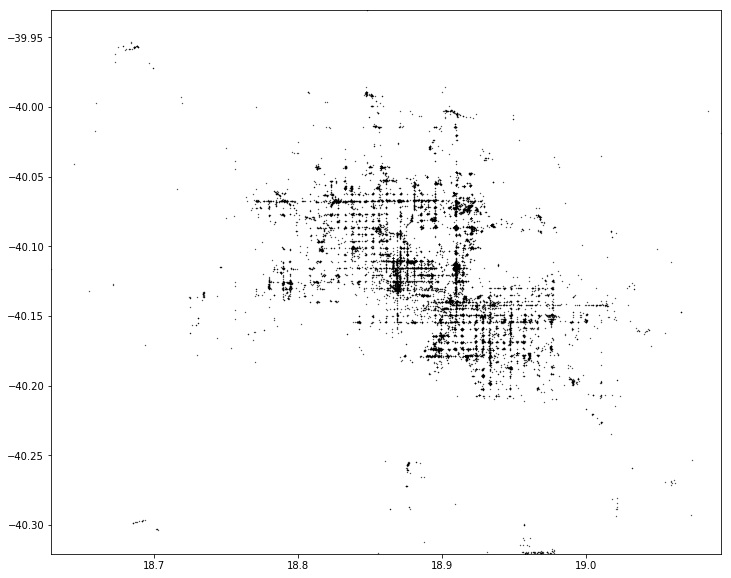

In [12]:
#e)
import matplotlib.pyplot as plt
%matplotlib inline
    
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

px, py = lat_lng_to_pixels(yelpdf['latitude'], yelpdf['longitude'])
plt.figure(figsize=(12, 10))
plt.axis()
plt.xlim(px.min(), px.max())
plt.ylim(py.min(), py.max())
plt.axis('on')
plt.gca().set_facecolor('white')
plt.scatter(px, py, s=.1, alpha=1, color='black')

In [13]:
#Another cool way to visualise our datapoints! 
#In this example we visualise only the first 100 businesses, so it runs fast. If we want to add all the markers in the map, we need to wait ~10mins
#!!! FOLIUM DOES NOT SUPPORT INTERNET EXPLORER YET
!pip install folium
import folium
#create a map
map_1 = folium.Map(location=[yelpdf['latitude'].mean(), yelpdf['longitude'].mean()],
tiles='Stamen Terrain',
zoom_start=9)
#create markers
for i in range(100):
    folium.Marker([yelpdf.loc[i,'latitude'], yelpdf.loc[i,'longitude']]).add_to(map_1)
map_1

In [15]:
#f ~5sec exec. time
#First we use apply to take all the lists from the 'categories' column
#Then we .stack() to convert them to long data format
#At last we use .unique() to extract duplicate categories
unique_categ = yelpdf.apply(lambda x: pd.Series(x['categories']),axis=1).stack().unique()
len(unique_categ) #Result = 591

591

In [17]:
#g)
#We create a new DF only with the Bakeries in Glendale
Glendale_Bakeries_Df = yelpdf[yelpdf['city']=='Glendale']\
.loc[yelpdf.apply(lambda row: True if 'Bakeries' in row['categories'] else False, axis = 1 )]
#Search for the row with maximum reviews
Glendale_Bakeries_Df.loc[Glendale_Bakeries_Df['review_count'].idxmax()]


attributes       {'Take-out': True, 'Wi-Fi': 'free', 'Good For'...
business_id                                 IhgKK2aoVjLihwriDQLS9g
categories               [Bakeries, Food, Sandwiches, Restaurants]
city                                                      Glendale
full_address                  20199 N 67th Ave\nGlendale, AZ 85308
hours                                                           {}
latitude                                                   33.6669
longitude                                                 -112.202
name                                        Paradise Bakery & Cafe
neighborhoods                                                   []
open                                                          True
review_count                                                    37
stars                                                            3
state                                                           AZ
type                                                      busi

In [24]:
#h)
#we select only the rows that have 5 stars 
Df_5star = yelpdf.loc[yelpdf['stars']==5]
#we use .value_counts() on the column 'city' to see the count per city
Df_5star.city.value_counts()

Phoenix            642
Scottsdale         417
Mesa               178
Tempe              176
Chandler           151
Gilbert             99
Glendale            92
Peoria              50
Surprise            27
Cave Creek          19
Goodyear            15
Apache Junction     14
Queen Creek         13
Paradise Valley     12
Avondale             9
Maricopa             9
Fountain Hills       9
Laveen               9
Sun City             7
El Mirage            6
Carefree             6
Youngtown            5
Anthem               5
Buckeye              5
Wickenburg           4
Casa Grande          4
San Tan Valley       3
Tolleson             2
Higley               2
Gold Canyon          1
Arcadia              1
chandler             1
Tonopah              1
Sun Lakes            1
Litchfield Park      1
Ahwatukee            1
Tortilla Flat        1
North Pinal          1
Name: city, dtype: int64